<a href="https://colab.research.google.com/github/Saoudyahya/pytorch/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.4.1+cu121'

In [ ]:
w=0.7
bias =0.3

s=0
e=1
step=0.02
X= torch.arange(s,e,step).unsqueeze(dim=1)
y=w*X+bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# creat a train/test
train=int(0.8*len(X))
x_train,y_train=X[:train],y[:train]
X_test,y_test=X[train:],y[train:]

len(x_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_prediction(train_data=x_train,train_label=y_train,
                    test_data=X_test,test_label=y_test,
                    prediction=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_label,c="b",s=4,label="trainnig_data")
  plt.scatter(test_data,test_label,c="g",s=4,label="teststing")
  if prediction is not None:
    plt.scatter(test_data,prediction,c='r',label='prediction')

  plt.legend(prop={"size":14})

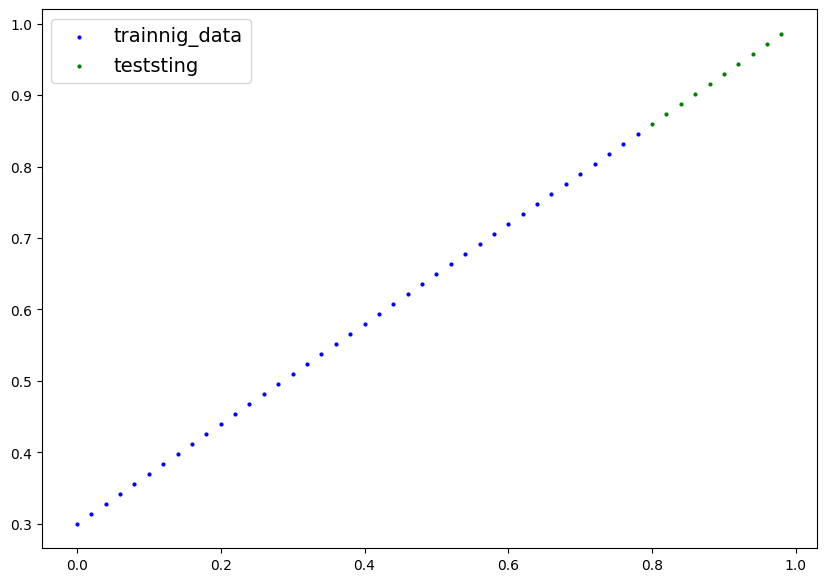

In [ ]:
plot_prediction()

In [ ]:
import torch
from torch import nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [ ]:
torch.manual_seed(42)

model0=LinearRegressionModel()

In [ ]:
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode():
  ypred=model0(X_test)

ypred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

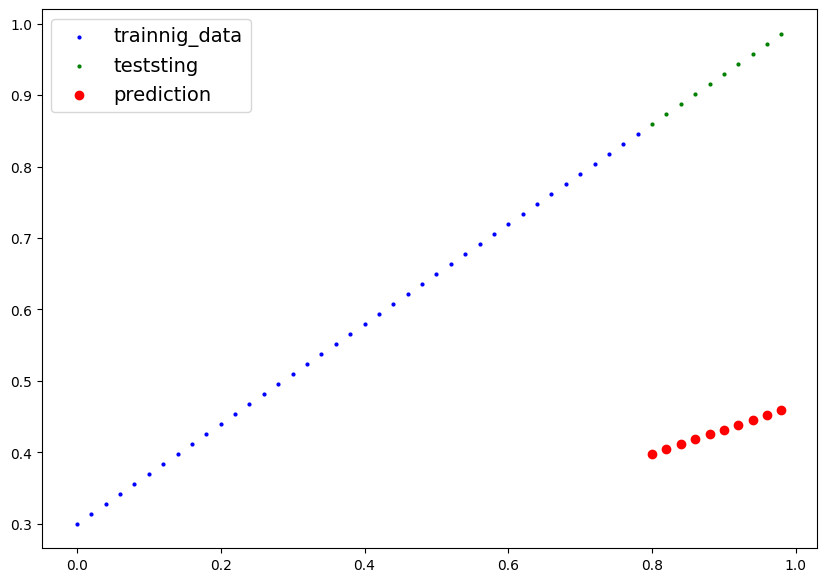

In [ ]:
plot_prediction(prediction=ypred)

In [ ]:
loss_fn=nn.L1Loss()
optimizer =torch.optim.SGD(params=model0.parameters(),lr=0.01)

In [ ]:
epochs=120

epoch_count=[]
loss_values=[]
test_loss_values=[]
torch.manual_seed(42)
for epoch in range(epochs):
  model0.train()
  ypred=model0(x_train)
  loss=loss_fn(ypred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model0.eval()
  with torch.inference_mode():
   test_pred=model0(X_test)
   test_loss=loss_fn(test_pred,y_test)
   if epoch % 10 == 0:
     epoch_count.append(epoch)
     loss_values.append(loss)
     test_loss_values.append(test_loss)
     print(f"epoch: {epoch} | loss : {loss} | test loss : {test_loss}")
     model0.state_dict()

epoch: 0 | loss : 0.31288138031959534 | test loss : 0.48106518387794495
epoch: 10 | loss : 0.1976713240146637 | test loss : 0.3463551998138428
epoch: 20 | loss : 0.08908725529909134 | test loss : 0.21729660034179688
epoch: 30 | loss : 0.053148526698350906 | test loss : 0.14464017748832703
epoch: 40 | loss : 0.04543796554207802 | test loss : 0.11360953003168106
epoch: 50 | loss : 0.04167863354086876 | test loss : 0.09919948130846024
epoch: 60 | loss : 0.03818932920694351 | test loss : 0.08886633068323135
epoch: 70 | loss : 0.03476089984178543 | test loss : 0.0805937647819519
epoch: 80 | loss : 0.03132382780313492 | test loss : 0.07232122868299484
epoch: 90 | loss : 0.02788739837706089 | test loss : 0.06473556160926819
epoch: 100 | loss : 0.024458957836031914 | test loss : 0.05646304413676262
epoch: 110 | loss : 0.021020207554101944 | test loss : 0.04819049686193466


In [ ]:
 print(f"epoch: {epoch_count} | loss : {loss_values} | test loss : {test_loss_values}")

epoch: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110] | loss : [tensor(0.3129, grad_fn=<MeanBackward0>), tensor(0.1977, grad_fn=<MeanBackward0>), tensor(0.0891, grad_fn=<MeanBackward0>), tensor(0.0531, grad_fn=<MeanBackward0>), tensor(0.0454, grad_fn=<MeanBackward0>), tensor(0.0417, grad_fn=<MeanBackward0>), tensor(0.0382, grad_fn=<MeanBackward0>), tensor(0.0348, grad_fn=<MeanBackward0>), tensor(0.0313, grad_fn=<MeanBackward0>), tensor(0.0279, grad_fn=<MeanBackward0>), tensor(0.0245, grad_fn=<MeanBackward0>), tensor(0.0210, grad_fn=<MeanBackward0>)] | test loss : [tensor(0.4811), tensor(0.3464), tensor(0.2173), tensor(0.1446), tensor(0.1136), tensor(0.0992), tensor(0.0889), tensor(0.0806), tensor(0.0723), tensor(0.0647), tensor(0.0565), tensor(0.0482)]


In [ ]:
import numpy as np
np.array(torch.tensor(loss_values).numpy())

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021], dtype=float32)

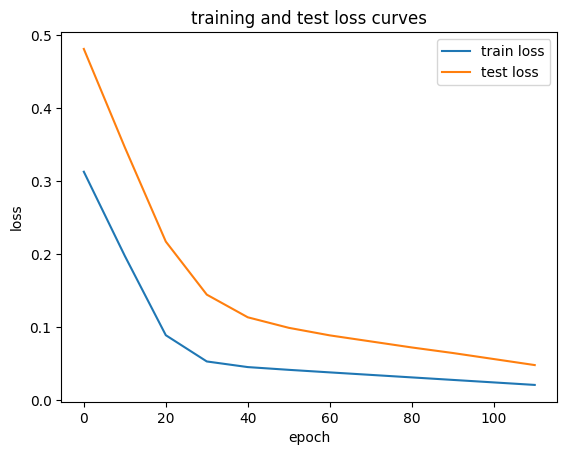

In [ ]:
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="train loss")
plt.plot(epoch_count,test_loss_values,label="test loss")
plt.title("training and test loss curves")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()

In [ ]:
model0.state_dict()

OrderedDict([('weights', tensor([0.6126])), ('bias', tensor([0.3368]))])

In [ ]:
with torch.inference_mode():
  ypred=model0(X_test)

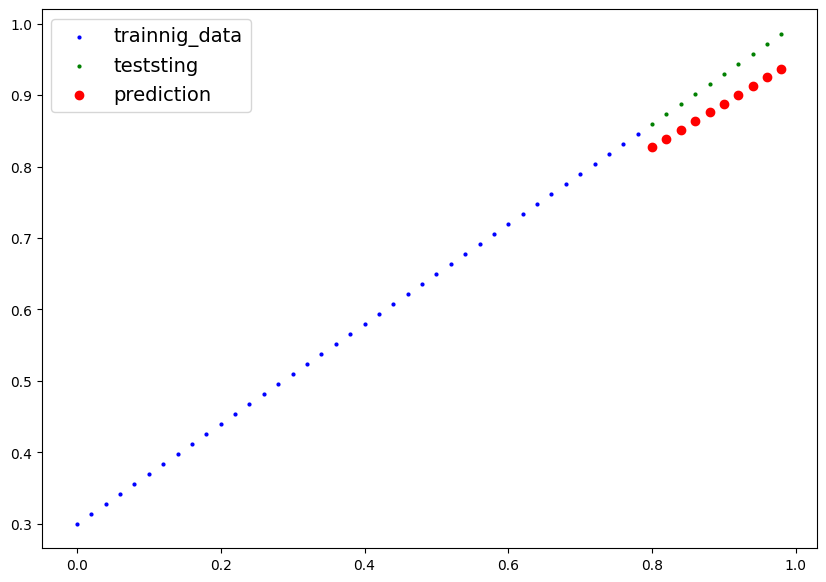

In [ ]:
plot_prediction(prediction=test_pred)

In [ ]:
import torch
from torch import nn

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer=nn.Linear(in_features=1,out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)


In [ ]:
torch.manual_seed(42)
modelv2=LinearRegressionModelV2()
modelv2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

n_samples= 1000
X,y=make_circles(n_samples,noise=0.03,random_state=42)

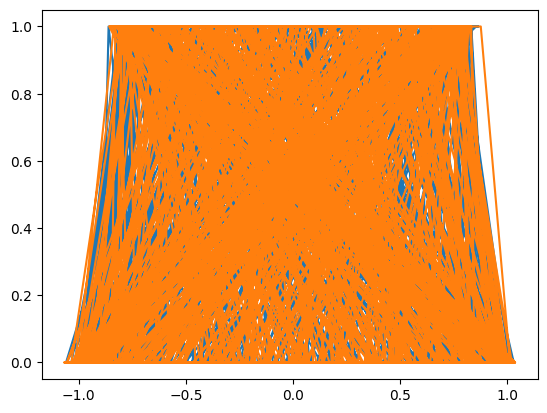

In [ ]:
plt.plot(X,y)

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],"X2": X[:, 1],"label":y})

In [ ]:
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


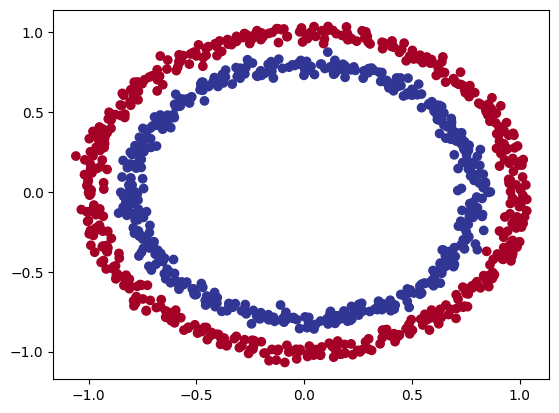

In [ ]:
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [ ]:
X

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        ...,
        [-0.1369, -0.8100],
        [ 0.6704, -0.7675],
        [ 0.2811,  0.9638]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
len(X_test)

200

In [ ]:
import torch

In [ ]:
device="cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [ ]:
class CircleModelLv0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=5)
    self.layer_2=nn.Linear(in_features=5,out_features=1)
  def forward(self,x):
    return  self.layer_2(self.layer_1(x))


In [ ]:
model8=CircleModelLv0().to(device)

In [ ]:
device

'cuda'

In [ ]:
 torch.manual_seed(42)
 model77=nn.Sequential(
      nn.Linear(in_features=2,out_features=5),
      nn.Linear(in_features=5,out_features=1)
 ).to(device)

In [ ]:
model77.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('0.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('1.bias', tensor([-0.2060], device='cuda:0'))])

In [ ]:
X_test

tensor([[-3.7519e-01,  6.8266e-01],
        [ 1.5380e-02,  9.6003e-01],
        [-7.0278e-01, -3.1472e-01],
        [-2.8525e-01,  9.6638e-01],
        [ 4.0242e-01, -7.4375e-01],
        [ 6.3228e-01, -5.7111e-01],
        [ 8.5607e-01,  5.4994e-01],
        [ 1.0034e+00,  1.9028e-01],
        [-7.4892e-01, -2.9511e-01],
        [ 5.3780e-02,  9.7388e-01],
        [-4.7020e-01,  7.8749e-01],
        [-2.1686e-01,  7.2418e-01],
        [ 9.7026e-01,  3.6688e-01],
        [-5.8446e-01, -5.7415e-01],
        [-9.1147e-01, -2.4631e-01],
        [ 7.6892e-01, -7.3249e-02],
        [ 3.8408e-01,  6.8299e-01],
        [-6.8364e-01,  7.1417e-01],
        [-5.7777e-01,  5.3652e-01],
        [-8.3274e-01,  4.6625e-01],
        [ 1.2448e-02,  9.8709e-01],
        [ 1.0091e+00, -2.1970e-01],
        [-6.6792e-01,  4.2861e-01],
        [-8.4405e-01,  6.1718e-01],
        [ 6.3680e-01,  7.4591e-01],
        [ 8.9413e-01,  3.6390e-01],
        [-2.3460e-01, -9.6400e-01],
        [ 8.5954e-01, -5.214

In [ ]:

with torch.inference_mode():
 untrined_prds=model77(X_test.to(device))
len(untrined_prds)

200

In [ ]:
untrined_prds[:10]

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]], device='cuda:0')

In [ ]:
loss_fn==nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model77.parameters(),lr=0.1)

In [ ]:
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

In [ ]:
with torch.inference_mode():
  y_logits=model77(X_test.to(device))[:5]
y_logits

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667]], device='cuda:0')

In [ ]:
 y_pred_probs=torch.sigmoid(y_logits)
 y_pred_probs

tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]], device='cuda:0')

In [ ]:
y_pred=torch.round(y_pred_probs)

In [ ]:
y_pred_label=torch.round(torch.sigmoid(model77(X_test.to(device))[:5]))
print(torch.eq(y_pred.squeeze(),y_pred_label.squeeze()))

tensor([True, True, True, True, True], device='cuda:0')


In [ ]:
torch.manual_seed(42)

epochs=100
X_train,X_test=X_train.to(device),X_train.to(device)
y_train,y_test=y_train.to(device),y_train.to(device)
model77=model77.to(device)
for epoch in range(epochs):
  model77.train()
  y_logits=model77(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model77.eval()
  with torch.inference_mode():
    test_logits=model77(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(y_logits))
    test_loss=loss_fn(y_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
    if epoch % 10 == 0:
     print(f"epoch: {epoch} | loss : {loss:.5f} |ACC:{acc:.2f}%| test loss : {test_loss:.5f},Test acc={test_acc:.3f}% ")


epoch: 0 | loss : 0.64676 |ACC:50.00%| test loss : 0.64676,Test acc=50.000% 
epoch: 10 | loss : 0.49871 |ACC:50.12%| test loss : 0.49871,Test acc=50.125% 
epoch: 20 | loss : 0.49857 |ACC:50.12%| test loss : 0.49857,Test acc=50.125% 
epoch: 30 | loss : 0.49842 |ACC:50.12%| test loss : 0.49842,Test acc=50.125% 
epoch: 40 | loss : 0.49828 |ACC:50.25%| test loss : 0.49828,Test acc=50.250% 
epoch: 50 | loss : 0.49814 |ACC:50.12%| test loss : 0.49814,Test acc=50.125% 
epoch: 60 | loss : 0.49800 |ACC:50.25%| test loss : 0.49800,Test acc=50.250% 
epoch: 70 | loss : 0.49786 |ACC:50.25%| test loss : 0.49786,Test acc=50.250% 
epoch: 80 | loss : 0.49773 |ACC:50.25%| test loss : 0.49773,Test acc=50.250% 
epoch: 90 | loss : 0.49759 |ACC:50.00%| test loss : 0.49759,Test acc=50.000% 


In [ ]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("helper_functions.py existe")
else:
  print("Download helper function.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)


from helper_functions import plot_predictions,plot_decision_boundary

Download helper function.py


Text(0.5, 1.0, 'test')

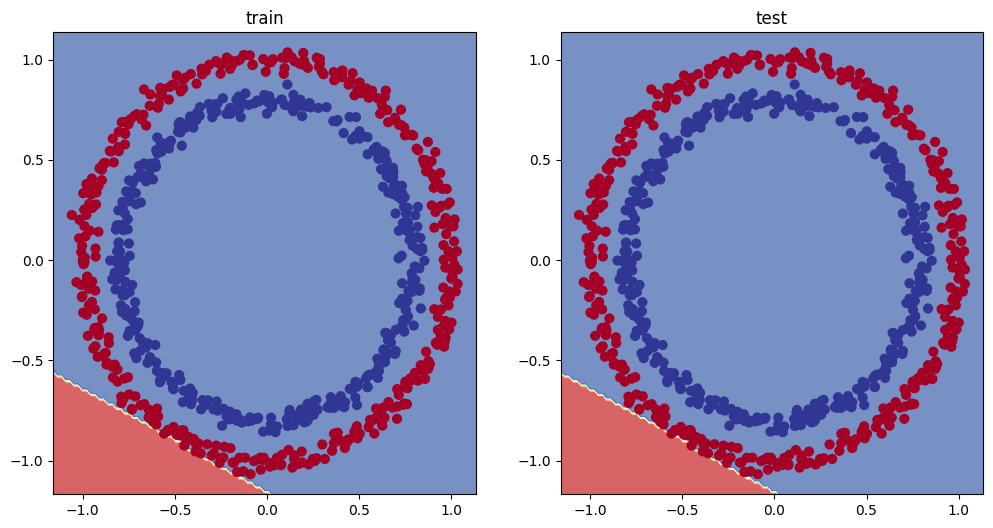

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model77,X_train,y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model77,X_test,y_test)
plt.title("test")

In [ ]:
class CircleModelLv2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
  def forward(self,x):
      return self.layer_3(self.layer_2(self.layer_1(x)))


In [ ]:
model88=CircleModelLv2().to(device)
model88

CircleModelLv2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn==nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model88.parameters(),lr=0.1)

In [ ]:

torch.manual_seed(42)

# Assuming model99 is already defined

epochs = 9000
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)
model88=model88.to(device)
# Define your loss function and accuracy function
loss_fn = nn.BCEWithLogitsLoss()  # Binary Cross Entropy with Logits
accuracy_fn = lambda y_true, y_pred: ((y_true == y_pred).sum().item() / len(y_true)) * 100

# Assuming you have already initialized your optimizer
optimizer = torch.optim.SGD(model88.parameters(), lr=0.1)
for epoch in range(epochs):
  model88.train()
  y_logits=model88(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model88.eval()
  with torch.inference_mode():
    test_logits=model88(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(y_logits))
    test_loss=loss_fn(y_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
    if epoch % 100 == 0:
     print(f"epoch: {epoch} | loss : {loss:.5f} |ACC:{acc:.2f}%| test loss : {test_loss:.5f},Test acc={test_acc:.3f}% ")


epoch: 0 | loss : 0.69396 |ACC:50.88%| test loss : 0.69396,Test acc=50.875% 
epoch: 100 | loss : 0.69305 |ACC:50.38%| test loss : 0.69305,Test acc=50.375% 
epoch: 200 | loss : 0.69299 |ACC:51.12%| test loss : 0.69299,Test acc=51.125% 
epoch: 300 | loss : 0.69298 |ACC:51.62%| test loss : 0.69298,Test acc=51.625% 
epoch: 400 | loss : 0.69298 |ACC:51.12%| test loss : 0.69298,Test acc=51.125% 
epoch: 500 | loss : 0.69298 |ACC:51.00%| test loss : 0.69298,Test acc=51.000% 
epoch: 600 | loss : 0.69298 |ACC:51.00%| test loss : 0.69298,Test acc=51.000% 
epoch: 700 | loss : 0.69298 |ACC:51.00%| test loss : 0.69298,Test acc=51.000% 
epoch: 800 | loss : 0.69298 |ACC:51.00%| test loss : 0.69298,Test acc=51.000% 
epoch: 900 | loss : 0.69298 |ACC:51.00%| test loss : 0.69298,Test acc=51.000% 
epoch: 1000 | loss : 0.69298 |ACC:51.00%| test loss : 0.69298,Test acc=51.000% 
epoch: 1100 | loss : 0.69298 |ACC:51.00%| test loss : 0.69298,Test acc=51.000% 
epoch: 1200 | loss : 0.69298 |ACC:51.00%| test loss 

Text(0.5, 1.0, 'test')

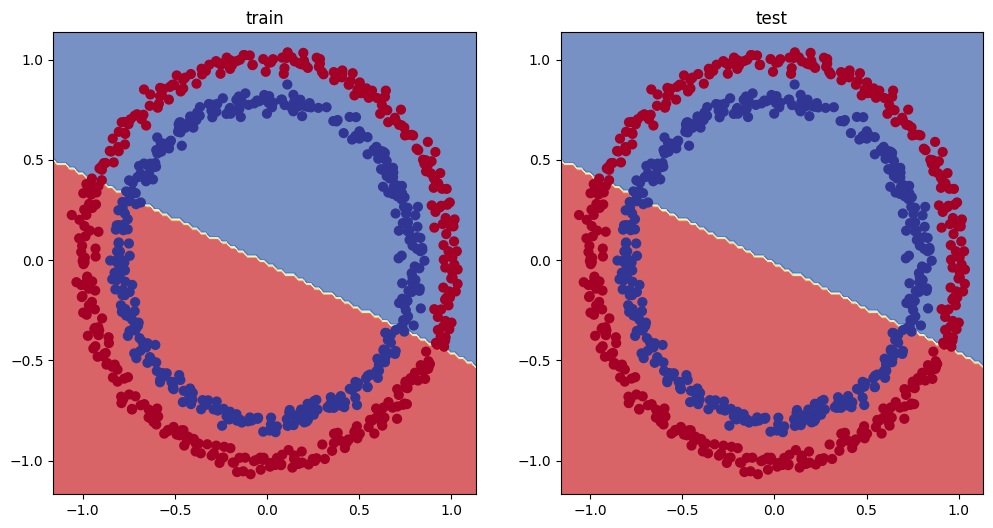

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model88,X_train,y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model88,X_test,y_test)
plt.title("test")

In [ ]:
model88.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5399,  0.5868],
                      [-0.1618,  0.6521],
                      [-0.1579,  0.1408],
                      [-0.3461,  0.4142],
                      [ 0.6176, -0.5224],
                      [ 0.6211,  0.1368],
                      [ 0.5210,  0.0951],
                      [ 0.3388, -0.1010],
                      [ 0.5338,  0.0974],
                      [-0.3410,  0.1731]])),
             ('layer_1.bias',
              tensor([-0.3256, -0.0830, -0.2871,  0.4692, -0.5580, -0.3260, -0.1995, -0.4250,
                       0.0671, -0.6982])),
             ('layer_2.weight',
              tensor([[ 0.2973, -0.2652,  0.2434,  0.0517, -0.0992,  0.2043,  0.0567,  0.2590,
                        0.0422, -0.1024],
                      [ 0.0644, -0.0915,  0.1344,  0.2843,  0.1761, -0.1541,  0.1695,  0.0502,
                        0.1472, -0.1882],
                      [-0.2934, -0.1167, -0.2438,  0.2577,  0.0973,  0.1

In [ ]:
class CircleModelLv3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()
  def forward(self,x):
      return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


In [ ]:
model99=CircleModelLv3().to(device)

In [ ]:
model99

CircleModelLv3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:

torch.manual_seed(42)

# Assuming model99 is already defined

epochs = 900
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)
model99=model99.to(device)
# Define your loss function and accuracy function
loss_fn = nn.BCEWithLogitsLoss()  # Binary Cross Entropy with Logits
accuracy_fn = lambda y_true, y_pred: ((y_true == y_pred).sum().item() / len(y_true)) * 100

# Assuming you have already initialized your optimizer
optimizer = torch.optim.SGD(model99.parameters(), lr=0.1)
for epoch in range(epochs):
  model99.train()
  y_logits=model99(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model99.eval()
  with torch.inference_mode():
    test_logits=model99(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
    if epoch % 100 == 0:
     print(f"epoch: {epoch} | loss : {loss:.5f} |ACC:{acc:.2f}%| test loss : {test_loss:.5f},Test acc={test_acc:.3f}% ")


epoch: 0 | loss : 0.69295 |ACC:50.00%| test loss : 0.69289,Test acc=50.000% 
epoch: 100 | loss : 0.69115 |ACC:52.88%| test loss : 0.69114,Test acc=52.875% 
epoch: 200 | loss : 0.68977 |ACC:53.37%| test loss : 0.68976,Test acc=53.250% 
epoch: 300 | loss : 0.68795 |ACC:53.00%| test loss : 0.68793,Test acc=53.000% 
epoch: 400 | loss : 0.68517 |ACC:52.75%| test loss : 0.68513,Test acc=52.750% 
epoch: 500 | loss : 0.68102 |ACC:52.75%| test loss : 0.68097,Test acc=52.750% 
epoch: 600 | loss : 0.67515 |ACC:54.50%| test loss : 0.67508,Test acc=54.500% 
epoch: 700 | loss : 0.66659 |ACC:58.38%| test loss : 0.66648,Test acc=58.375% 
epoch: 800 | loss : 0.65160 |ACC:64.00%| test loss : 0.65140,Test acc=64.000% 


In [ ]:
model99.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.6010,  0.7125],
                      [-0.2012,  0.7224],
                      [-0.1549,  0.1427],
                      [-0.7896,  0.3573],
                      [ 0.6827, -1.1321],
                      [ 0.6215,  0.1632],
                      [ 0.7159,  0.1754],
                      [ 0.3410, -0.0998],
                      [ 0.6166,  0.2505],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3799, -0.1484, -0.2872,  0.2860, -0.4331, -0.3517, -0.3314, -0.4252,
                      -0.1555, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.1630, -0.3556,  0.2441, -0.0115, -0.2419,  0.1219, -0.0266,  0.2555,
                       -0.0301, -0.0997],
                      [ 0.6312,  0.2922,  0.1331,  0.5920,  0.8161,  0.1846,  0.5176,  0.0566,
                        0.4377, -0.1927],
                      [-0.3130, -0.122

Text(0.5, 1.0, 'test')

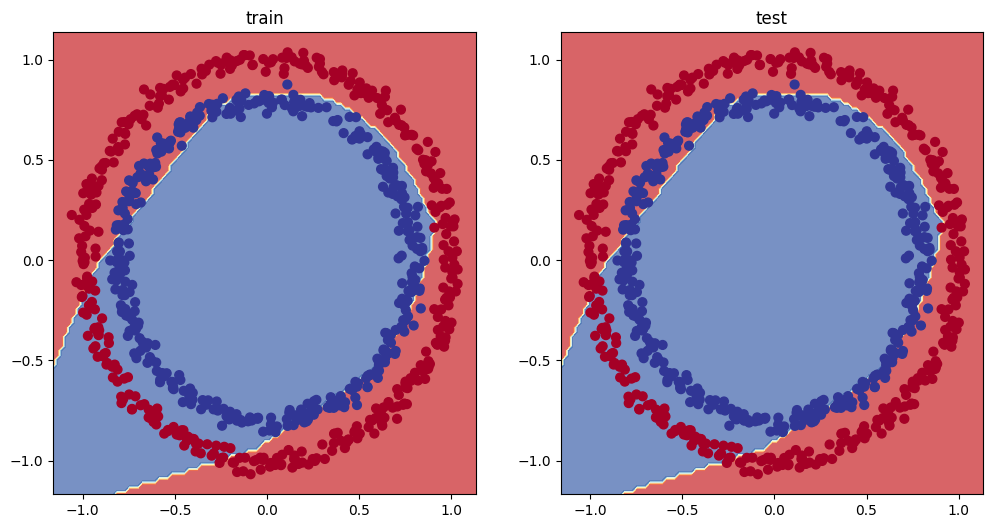

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model99,X_train,y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model99,X_test,y_test)
plt.title("test")

In [ ]:
torch.eq(y_pred,y_test)

tensor([False,  True,  True, False,  True, False, False,  True,  True,  True,
        False,  True,  True,  True,  True, False,  True, False,  True, False,
        False,  True,  True,  True, False, False,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True, False,  True,
        False,  True, False,  True, False, False, False,  True, False, False,
        False,  True, False, False,  True,  True,  True, False,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False,  True, False,  True,  True,  True,
         True,  True, False, False,  True,  True,  True, False, False,  True,
         True,  True,  True,  True,  True,  True, False, False,  True,  True,
        False,  True, False,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True, False,  True, False,  True,  True, False,
        False,  True,  True, False,  True, False,  True,  True, 

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [ ]:
Num_classes = 4
Num_features = 2
Random_Seed = 42
X_blob,y_blob=make_blobs(n_samples=1000,
                         n_features=Num_features,
                         centers=Num_classes,
                         cluster_std=1.5,
                        random_state=Random_Seed)
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train,X_blob_test,y_blob_train,y_blob_test=train_test_split(X_blob,y_blob,test_size=0.2,random_state=Random_Seed)

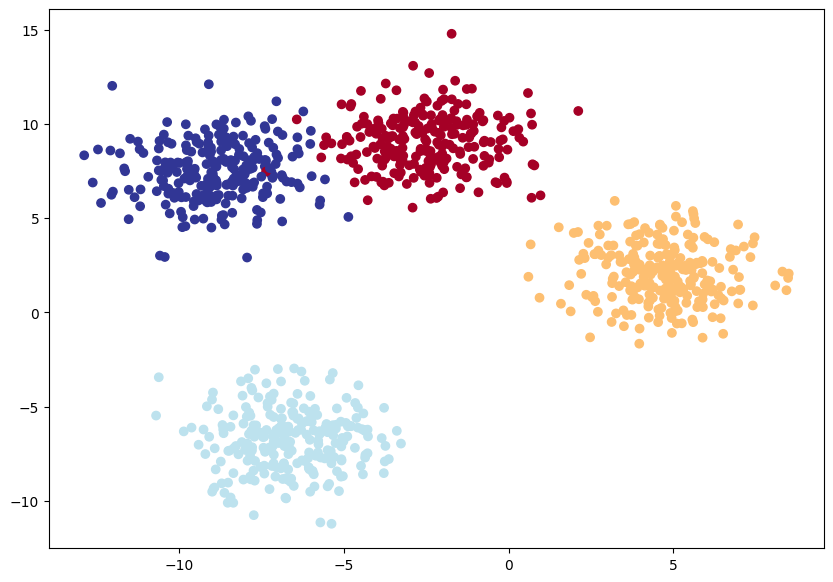

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

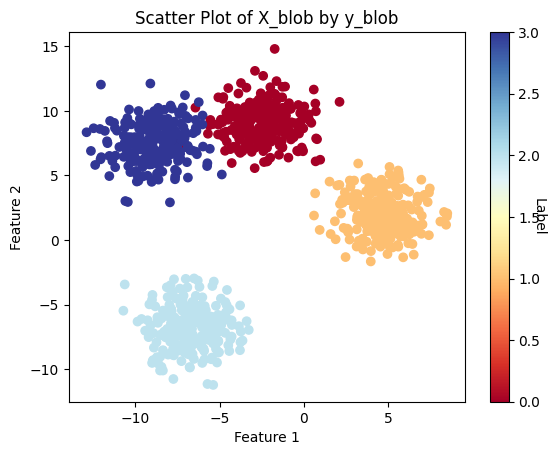

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already defined X_blob and y_blob as NumPy arrays
# For example, X_blob = np.array([[x1, y1], [x2, y2], ...]) and y_blob = np.array([label1, label2, ...])

# Create the scatter plot
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

# Add color bar to show the mapping of colors to labels
cbar = plt.colorbar()
cbar.set_label('Label', rotation=270)

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of X_blob by y_blob')

# Show the plot
plt.show()

In [ ]:
y_blob

tensor([3, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 3, 0, 2, 2, 2, 0, 0, 0, 1, 1, 3, 3, 3,
        1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 0, 3, 2, 1, 3, 3, 1, 2, 1, 3, 1, 3, 0, 1,
        3, 1, 2, 0, 1, 3, 0, 3, 0, 0, 0, 2, 2, 0, 2, 3, 1, 0, 2, 2, 1, 0, 3, 0,
        1, 2, 1, 3, 1, 0, 1, 0, 2, 0, 0, 0, 1, 3, 2, 2, 0, 0, 0, 0, 1, 1, 3, 1,
        3, 0, 1, 2, 1, 3, 3, 0, 3, 1, 1, 0, 2, 0, 3, 2, 1, 1, 1, 1, 2, 3, 2, 1,
        0, 2, 3, 1, 3, 2, 1, 3, 2, 1, 0, 2, 1, 3, 1, 3, 0, 2, 1, 1, 0, 0, 3, 3,
        3, 1, 1, 0, 0, 0, 0, 3, 2, 2, 0, 1, 0, 1, 1, 3, 2, 0, 1, 2, 0, 0, 1, 2,
        3, 2, 1, 0, 0, 1, 0, 3, 2, 3, 2, 3, 1, 1, 0, 2, 0, 2, 1, 3, 0, 2, 1, 0,
        1, 1, 0, 3, 2, 2, 2, 3, 0, 2, 1, 0, 1, 1, 2, 0, 1, 2, 2, 3, 2, 2, 1, 0,
        2, 0, 3, 1, 3, 3, 2, 0, 3, 0, 1, 2, 2, 0, 0, 2, 0, 3, 2, 2, 3, 2, 2, 1,
        2, 3, 2, 1, 3, 0, 1, 0, 1, 1, 1, 1, 3, 1, 1, 2, 0, 2, 2, 1, 1, 1, 3, 1,
        3, 3, 2, 1, 0, 3, 1, 0, 1, 2, 0, 3, 1, 3, 2, 1, 3, 2, 3, 1, 2, 0, 0, 2,
        0, 3, 3, 0, 2, 2, 2, 0, 2, 2, 2,

In [ ]:
class blobModel(nn.Module):
  def __init__(self,input_features,output_featurs,hidden_units=8):
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_featurs)
    )
  def forward(self,x):
    return self.linear_layer_stack(x)

In [ ]:
model100=blobModel(input_features=2,output_featurs=4,hidden_units=8).to(device)

In [ ]:
model100.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998]], device='cuda:0')),
             ('linear_layer_stack.0.bias',
              tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691],
                     device='cuda:0')),
             ('linear_layer_stack.2.weight',
              tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
                      [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
                      [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
                      [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model100.parameters(),lr=0.1)


In [ ]:
X_blob_test,X_blob_test=X_blob_test.to(device),X_blob_test.to(device)
y_blob_test,y_blob_test=y_blob_test.to(device),y_blob_test.to(device)

In [ ]:
print(y_blob_test.shape)

torch.Size([200])


In [ ]:
model100.eval()
with torch.inference_mode():
 y_logits=model100(X_blob_test.to(device))

In [ ]:

y_pred=torch.softmax(y_logits,dim=1)

t=torch.argmax(y_pred,dim=1)
t

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [ ]:
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

In [ ]:
X_blob_train,X_blob_test=X_blob_train.to(device),X_blob_test.to(device)
y_blob_train,y_blob_test=y_blob_train.to(device),y_blob_test.to(device)
model100.to(device)
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model100.parameters(),lr=0.1)
accuracy_fn = lambda y_true, y_pred: ((y_true == y_pred).sum().item() / len(y_true)) * 100
epochs=1000
for epoch in range(epochs):
  model100.train()
  y_logits=model100(X_blob_train)
  y_pred=y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)
  loss=loss_fn(y_logits,y_blob_train)
  acc=accuracy_fn(y_true=y_blob_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model100.eval()
  with torch.inference_mode():
    test_logits=y_logits=model100(X_blob_test)
    test_y_pred=y_pred=torch.softmax(test_logits,dim=1).argmax(dim=1)
    test_loss=loss_fn(test_logits,y_blob_test)
    test_acc=acc=accuracy_fn(y_true=y_blob_test,y_pred=y_pred)
    if epoch % 10==0:
      print(f"epoch = {epoch} // loss = {loss:0.4f} // acc ={acc:0.2f}% // test_loss={test_loss:0.4f}// test_acc={test_acc:0.2f}%")

epoch = 0 // loss = 1.1588 // acc =48.00% // test_loss=1.0755// test_acc=48.00%
epoch = 10 // loss = 0.6448 // acc =97.50% // test_loss=0.6607// test_acc=97.50%
epoch = 20 // loss = 0.4254 // acc =100.00% // test_loss=0.4307// test_acc=100.00%
epoch = 30 // loss = 0.2529 // acc =99.50% // test_loss=0.2451// test_acc=99.50%
epoch = 40 // loss = 0.1123 // acc =99.50% // test_loss=0.1023// test_acc=99.50%
epoch = 50 // loss = 0.0663 // acc =99.50% // test_loss=0.0585// test_acc=99.50%
epoch = 60 // loss = 0.0507 // acc =99.50% // test_loss=0.0429// test_acc=99.50%
epoch = 70 // loss = 0.0430 // acc =99.50% // test_loss=0.0349// test_acc=99.50%
epoch = 80 // loss = 0.0384 // acc =99.50% // test_loss=0.0299// test_acc=99.50%
epoch = 90 // loss = 0.0352 // acc =99.50% // test_loss=0.0266// test_acc=99.50%
epoch = 100 // loss = 0.0331 // acc =99.50% // test_loss=0.0243// test_acc=99.50%
epoch = 110 // loss = 0.0316 // acc =99.50% // test_loss=0.0226// test_acc=99.50%
epoch = 120 // loss = 0.0

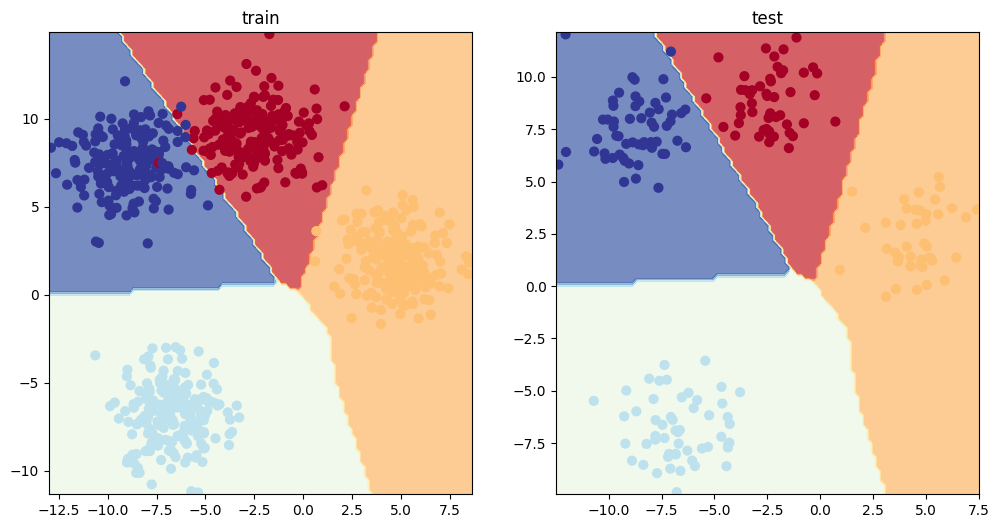

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model100,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model100,X_blob_test,y_blob_test)

In [ ]:
y_pred

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')